In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Define variables and read files (change file locations as needed)

In [2]:
colName=["Energy", "Aeff", "Err", "Nthrown", "Npassed", "weight_thrown", "Veff","Err_Veff"]
default = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_default.txt",names=colName)
sigma_up = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_sigma_up.txt",names=colName)
sigma_low = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_sigma_low.txt",names=colName)
sigmacs_up = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_sigma_upcs.txt",names=colName)
sigmacs_low = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_sigma_lowcs.txt",names=colName)
askaryan_up = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_askaryan_up.txt",names=colName)
askaryan_low = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_askaryan_low.txt",names=colName)
Latten_up = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_Latten_up.txt",names=colName)
Latten_low = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_Latten_low.txt",names=colName)
nofz_up = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_nofz_up.txt",names=colName)
nofz_low = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_nofz_low.txt",names=colName)
signal_chain_low = pd.read_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/signal_chain_low_systematics.csv")
disappearing_Trigg = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_disappTrigg.txt",names=colName)
effs = pd.read_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/ARA02_config1_systematics_signalEfficiency_moreStats.csv")



In [3]:
effs["E"] = np.power(10, effs["E"])
effs
# askaryan_up

,E,Default,Latten_low,err_Llow,Latten_up,err_Lup,nofz_low,err_nlow,nofz_up,err_nup,SC_low,err_SClow
0,1.000000e+16,0.039609,0.040903,0.007605,0.035229,0.007828,0.047847,0.008958,0.043772,0.008627,0.042560,0.014543
1,3.162278e+16,0.138656,0.140030,0.006433,0.154733,0.007882,0.139174,0.006999,0.127705,0.006944,0.155697,0.025964
2,1.000000e+17,0.229719,0.217726,0.004029,0.208429,0.004646,0.217897,0.004589,0.193088,0.004280,0.244923,0.041745
3,3.162278e+17,0.290671,0.281803,0.002786,0.294462,0.003513,0.295667,0.003395,0.270716,0.003261,0.303906,0.025969
4,1.000000e+18,0.340893,0.357867,0.004368,0.350703,0.005439,0.369904,0.005505,0.339575,0.004990,0.388021,0.020785
5,3.162278e+18,0.448189,0.434535,0.003764,0.425095,0.004706,0.438712,0.004611,0.407252,0.004105,0.437614,0.025781
6,1.000000e+19,0.506956,0.498903,0.007478,0.474635,0.009138,0.495589,0.008678,0.463689,0.007584,0.485342,0.031196
7,3.162278e+19,0.539228,0.537572,0.007011,0.512709,0.008636,0.541732,0.008669,0.519708,0.007308,0.548539,0.030165
8,1.000000e+20,0.551906,0.578782,0.006840,0.547628,0.008375,0.559774,0.008312,0.546804,0.006977,0.571462,0.040862
9,3.162278e+20,0.585616,0.572751,0.006693,0.561657,0.008539,0.580393,0.007504,0.558650,0.006945,0.615806,0.044536


### Re-arrange indices and drop their columns

In [4]:
default=default.sort_values(by='Energy')
default=default.reset_index()
default = default.drop("index",axis=1)

sigma_up=sigma_up.sort_values(by='Energy')
sigma_up=sigma_up.reset_index()
sigma_up = sigma_up.drop("index",axis=1)
sigma_low=sigma_low.sort_values(by='Energy')
sigma_low=sigma_low.reset_index()
sigma_low = sigma_low.drop("index",axis=1)

sigmacs_up=sigmacs_up.sort_values(by='Energy')
sigmacs_up=sigmacs_up.reset_index()
sigmacs_up = sigmacs_up.drop("index",axis=1)
sigmacs_low=sigmacs_low.sort_values(by='Energy')
sigmacs_low=sigmacs_low.reset_index()
sigmacs_low = sigmacs_low.drop("index",axis=1)


askaryan_up=askaryan_up.sort_values(by='Energy')
askaryan_up=askaryan_up.reset_index()
askaryan_up = askaryan_up.drop("index",axis=1)
askaryan_low=askaryan_low.sort_values(by='Energy')
askaryan_low=askaryan_low.reset_index()
askaryan_low = askaryan_low.drop("index",axis=1)


Latten_up=Latten_up.sort_values(by='Energy')
Latten_up=Latten_up.reset_index()
Latten_up = Latten_up.drop("index",axis=1)
Latten_low=Latten_low.sort_values(by='Energy')
Latten_low=Latten_low.reset_index()
Latten_low = Latten_low.drop("index",axis=1)


nofz_up=nofz_up.sort_values(by='Energy')
nofz_up=nofz_up.reset_index()
nofz_up = nofz_up.drop("index",axis=1)
nofz_low=nofz_low.sort_values(by='Energy')
nofz_low=nofz_low.reset_index()
nofz_low = nofz_low.drop("index",axis=1)

signal_chain_low=signal_chain_low.sort_values(by='Energy')
signal_chain_low=signal_chain_low.reset_index()
signal_chain_low=signal_chain_low.drop("index",axis=1)

disappearing_Trigg=disappearing_Trigg.sort_values(by='Energy')
disappearing_Trigg=disappearing_Trigg.reset_index()
disappearing_Trigg=disappearing_Trigg.drop("index",axis=1)


### Cross section systematics

#### Effective area

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ax[0].loglog(default["Energy"], default["Aeff"], label="Default")
ax[0].plot(sigma_up["Energy"], sigma_up["Aeff"], label="Sigma, upper bound")
ax[0].plot(sigma_low["Energy"], sigma_low["Aeff"], label="Sigma, lower bound")

ax[0].fill_between(default["Energy"],default["Aeff"]-default["Err"],default["Aeff"]+default["Err"], alpha=0.5)
ax[0].fill_between(sigma_up["Energy"],sigma_up["Aeff"]-sigma_up["Err"],sigma_up["Aeff"]+sigma_up["Err"], alpha=0.5)
ax[0].fill_between(sigma_low["Energy"],sigma_low["Aeff"]-sigma_low["Err"],sigma_low["Aeff"]+sigma_low["Err"], alpha=0.5)


ax[0].set_xlabel("Energy [eV]",fontsize=13)
# plt.title("Comparison std & upper bound of L_atten", fontsize=12)
ax[0].set_ylabel("$A_{eff}$ [cm$^2 \cdot$ sr]",fontsize=13)
ax[0].grid()
ax[0].legend()

#####

ax[1].plot(sigma_low["Energy"],(sigma_low["Aeff"]-default["Aeff"])/default["Aeff"],c="C2",label="Relative error lower bound/default")
ratio2 = (sigma_low["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio2 = np.sqrt((sigma_low["Err"]/default["Aeff"])**2+(sigma_low["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(sigma_low["Energy"],ratio2-err_ratio2,ratio2+err_ratio2, color="C2",alpha=0.3)

ax[1].plot(sigma_up["Energy"],(sigma_up["Aeff"]-default["Aeff"])/default["Aeff"],c="C1", label="Relative error upper bound/default")
ratio = (sigma_up["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio = np.sqrt((sigma_up["Err"]/default["Aeff"])**2+(sigma_up["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(sigma_up["Energy"],ratio-err_ratio,ratio+err_ratio,color="C1",alpha=0.3)

ax[1].set_xscale('log')
# plt.title("abs(with-without)/with", fontsize=14)
ax[1].set_ylabel("Relative error", fontsize=12)
ax[1].set_xlabel("Energy [eV]", fontsize=12)
ax[1].grid()

plt.legend(loc='best')
plt.suptitle("Cross section systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/Aeff_comparison_sigma.png", dpi=250)
sigma_low.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/sigma_low_systematics.csv", index=False, index_label=False)
sigma_up.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/sigma_up_systematics.csv", index=False, index_label=False)
default.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/default.csv", index=False, index_label=False)

    

#### Histogram of (weighted) passed events

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].scatter(sigma_up["Energy"],sigma_up["Npassed"], s=12, label="Upper bound")
axes[0].scatter(sigma_low["Energy"],sigma_low["Npassed"], s=12,marker="*", label="Lower bound")
axes[0].scatter(default["Energy"],default["Npassed"], s=12,marker="^", label="Default")

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title("Number of passing \n events (weighted)")
axes[0].set_xlabel("Energy [eV]")


axes[1].scatter(sigma_up["Energy"],sigma_up["Npassed"]/sigma_up["Nthrown"],s=12, label="Upper bound")
axes[1].scatter(askaryan_low["Energy"],sigma_low["Npassed"]/sigma_low["Nthrown"],s=12, marker="*", label="Lower bound")
axes[1].scatter(default["Energy"],default["Npassed"]/default["Nthrown"],s=12, marker="^", label="Default")

axes[1].set_xscale('log')
axes[1].set_title("Ratio of passing \n to thrown events (weighted)")
axes[1].set_xlabel("Energy [eV]")
axes[1].set_ylim(0,0.01)

# axes[1].set_yscale('log')
plt.legend()
plt.suptitle("Cross section systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/sigma_passing.png", dpi=250)

### Askaryan systematics

#### Effective area

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ax[0].loglog(default["Energy"], default["Aeff"], label="Default")
ax[0].plot(askaryan_up["Energy"], askaryan_up["Aeff"], label="askaryan, upper bound")
ax[0].plot(askaryan_low["Energy"], askaryan_low["Aeff"], label="askaryan, lower bound")

ax[0].fill_between(default["Energy"],default["Aeff"]-default["Err"],default["Aeff"]+default["Err"], alpha=0.5)
ax[0].fill_between(askaryan_up["Energy"],askaryan_up["Aeff"]-askaryan_up["Err"],askaryan_up["Aeff"]+askaryan_up["Err"], alpha=0.5)
ax[0].fill_between(askaryan_low["Energy"],askaryan_low["Aeff"]-askaryan_low["Err"],askaryan_low["Aeff"]+askaryan_low["Err"], alpha=0.5)


ax[0].set_xlabel("Energy [eV]",fontsize=13)
# plt.title("Comparison std & upper bound of L_atten", fontsize=12)
ax[0].set_ylabel("$A_{eff}$ [cm$^2 \cdot$ sr]",fontsize=13)
ax[0].grid()
ax[0].legend()

####

ax[1].plot(askaryan_low["Energy"],(askaryan_low["Aeff"]-default["Aeff"])/default["Aeff"],c="C2",label="Relative error lower bound/default")
ratio2 = (askaryan_low["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio2 = np.sqrt((askaryan_low["Err"]/default["Aeff"])**2+(askaryan_low["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(askaryan_low["Energy"],ratio2-err_ratio2,ratio2+err_ratio2, color="C2",alpha=0.3)

ax[1].plot(askaryan_up["Energy"],(askaryan_up["Aeff"]-default["Aeff"])/default["Aeff"],c="C1", label="Relative error upper bound/default")
ratio = (askaryan_up["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio = np.sqrt((askaryan_up["Err"]/default["Aeff"])**2+(askaryan_up["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(askaryan_up["Energy"],ratio-err_ratio,ratio+err_ratio,color="C1",alpha=0.3)

ax[1].set_xscale('log')
# plt.title("abs(with-without)/with", fontsize=14)
ax[1].set_ylabel("Relative error", fontsize=12)
ax[1].set_xlabel("Energy [eV]", fontsize=12)
ax[1].grid()

plt.legend(loc='best')
plt.suptitle("Askaryan model systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/Aeff_comparison_askaryan.png", dpi=250)
askaryan_low.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/askaryan_low_systematics.csv", index=False, index_label=False)
askaryan_up.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/askaryan_up_systematics.csv", index=False, index_label=False)


#### Histogram of passed events

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].scatter(askaryan_up["Energy"],askaryan_up["Npassed"], s=12, label="Upper bound")
axes[0].scatter(askaryan_low["Energy"],askaryan_low["Npassed"], s=12,marker="*", label="Lower bound")
axes[0].scatter(default["Energy"],default["Npassed"], s=12,marker="^", label="Default")

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title("Number of passing \n events (weighted)")
axes[0].set_xlabel("Energy [eV]")


axes[1].scatter(askaryan_up["Energy"],askaryan_up["Npassed"]/askaryan_up["Nthrown"],s=12, label="Upper bound")
axes[1].scatter(askaryan_low["Energy"],askaryan_low["Npassed"]/askaryan_low["Nthrown"],s=12, marker="*", label="Lower bound")
axes[1].scatter(default["Energy"],default["Npassed"]/default["Nthrown"],s=12, marker="^", label="Default")

axes[1].set_xscale('log')
axes[1].set_title("Ratio of passing \n to thrown events (weighted)")
axes[1].set_xlabel("Energy [eV]")
axes[1].set_ylim(0,0.01)

# axes[1].set_yscale('log')
plt.legend()
plt.suptitle("Askaryan model systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/askaryan_passing.png", dpi=250)

## Latten ice model

#### Effective volume

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ax[0].loglog(default["Energy"], default["Aeff"], label="Default")
ax[0].plot(Latten_up["Energy"], Latten_up["Aeff"], label="$L_{atten}$, upper bound")
ax[0].plot(Latten_low["Energy"], Latten_low["Aeff"], label="$L_{atten}$, lower bound")

ax[0].fill_between(default["Energy"],default["Aeff"]-default["Err"],default["Aeff"]+default["Err"], alpha=0.5)
ax[0].fill_between(Latten_up["Energy"],Latten_up["Aeff"]-Latten_up["Err"],Latten_up["Aeff"]+Latten_up["Err"], alpha=0.5)
ax[0].fill_between(Latten_low["Energy"],Latten_low["Aeff"]-Latten_low["Err"],Latten_low["Aeff"]+Latten_low["Err"], alpha=0.5)


ax[0].set_xlabel("Energy [eV]",fontsize=13)
# plt.title("Comparison std & upper bound of L_atten", fontsize=12)
ax[0].set_ylabel("$A_{eff}$ [cm$^2 \cdot$ sr]",fontsize=13)
ax[0].grid()
ax[0].legend()

####

ax[1].plot(Latten_low["Energy"],(Latten_low["Aeff"]-default["Aeff"])/default["Aeff"],c="C2",label="Relative error lower bound/default")
ratio2 = (Latten_low["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio2 = np.sqrt((Latten_low["Err"]/default["Aeff"])**2+(Latten_low["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(Latten_low["Energy"],ratio2-err_ratio2,ratio2+err_ratio2, color="C2",alpha=0.3)

ax[1].plot(Latten_up["Energy"],(Latten_up["Aeff"]-default["Aeff"])/default["Aeff"],c="C1", label="Relative error upper bound/default")
ratio = (Latten_up["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio = np.sqrt((Latten_up["Err"]/default["Aeff"])**2+(Latten_up["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(Latten_up["Energy"],ratio-err_ratio,ratio+err_ratio,color="C1",alpha=0.3)

ax[1].set_xscale('log')
# plt.title("abs(with-without)/with", fontsize=14)
ax[1].set_ylabel("Relative error", fontsize=12)
ax[1].set_xlabel("Energy [eV]", fontsize=12)
ax[1].grid()

plt.legend(loc='best')
plt.suptitle("$L_{atten}$ model systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/Aeff_comparison_Latten.png", dpi=250)
Latten_low.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/Latten_low_systematics.csv", index=False, index_label=False)
Latten_up.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/Latten_up_systematics.csv", index=False, index_label=False)


#### Histogram of passed events

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].scatter(Latten_up["Energy"],Latten_up["Npassed"], s=12, label="Upper bound")
axes[0].scatter(Latten_low["Energy"],Latten_low["Npassed"], s=12,marker="*", label="Lower bound")
axes[0].scatter(default["Energy"],default["Npassed"], s=12,marker="^", label="Default")

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title("Number of passing \n events (weighted)")
axes[0].set_xlabel("Energy [eV]")


axes[1].scatter(Latten_up["Energy"],Latten_up["Npassed"]/Latten_up["Nthrown"],s=12, label="Upper bound")
axes[1].scatter(Latten_low["Energy"],Latten_low["Npassed"]/Latten_low["Nthrown"],s=12, marker="*", label="Lower bound")
axes[1].scatter(default["Energy"],default["Npassed"]/default["Nthrown"],s=12, marker="^", label="Default")

axes[1].set_xscale('log')
axes[1].set_title("Ratio of passing \n to thrown events (weighted)")
axes[1].set_xlabel("Energy [eV]")
axes[1].set_ylim(0,0.01)

# axes[1].set_yscale('log')
plt.legend()
plt.suptitle("Latten systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/Latten_passing.png", dpi=250)

## n(z)

#### Effective volume

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ax[0].loglog(default["Energy"], default["Aeff"], label="Default")
ax[0].plot(nofz_up["Energy"], nofz_up["Aeff"], label="$n(z)$, upper bound")
ax[0].plot(nofz_low["Energy"], nofz_low["Aeff"], label="$n(z)$, lower bound")

ax[0].fill_between(default["Energy"],default["Aeff"]-default["Err"],default["Aeff"]+default["Err"], alpha=0.5)
ax[0].fill_between(nofz_up["Energy"],nofz_up["Aeff"]-nofz_up["Err"],nofz_up["Aeff"]+nofz_up["Err"], alpha=0.5)
ax[0].fill_between(nofz_low["Energy"],nofz_low["Aeff"]-nofz_low["Err"],nofz_low["Aeff"]+nofz_low["Err"], alpha=0.5)


ax[0].set_xlabel("Energy [eV]",fontsize=13)
# plt.title("Comparison std & upper bound of L_atten", fontsize=12)
ax[0].set_ylabel("$A_{eff}$ [cm$^2 \cdot$ sr]",fontsize=13)
ax[0].grid()
ax[0].legend()

####
ax[1].plot(nofz_up["Energy"],(nofz_up["Aeff"]-default["Aeff"])/default["Aeff"],c="C1", label="Relative error upper bound/default")
ratio = (nofz_up["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio = np.sqrt((nofz_up["Err"]/default["Aeff"])**2+(nofz_up["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(nofz_up["Energy"],ratio-err_ratio,ratio+err_ratio,color="C1",alpha=0.3)


ax[1].plot(nofz_low["Energy"],(nofz_low["Aeff"]-default["Aeff"])/default["Aeff"],c="C2",label="Relative error lower bound/default")
ratio2 = (nofz_low["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio2 = np.sqrt((nofz_low["Err"]/default["Aeff"])**2+(nofz_low["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(nofz_low["Energy"],ratio2-err_ratio2,ratio2+err_ratio2, color="C2",alpha=0.3)

ax[1].set_xscale('log')
# plt.title("abs(with-without)/with", fontsize=14)
ax[1].set_ylabel("Relative error", fontsize=12)
ax[1].set_xlabel("Energy [eV]", fontsize=12)
ax[1].grid()

plt.legend(loc='best')
plt.suptitle("$n(z)$ model systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/Aeff_comparison_nofz.png", dpi=250)
nofz_low.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/nofz_low_systematics.csv", index=False, index_label=False)
nofz_up.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/nofz_up_systematics.csv", index=False, index_label=False)


#### Histogram of passed events

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].scatter(nofz_up["Energy"],nofz_up["Npassed"], s=12, label="Upper bound")
axes[0].scatter(nofz_low["Energy"],nofz_low["Npassed"], s=12,marker="*", label="Lower bound")
axes[0].scatter(default["Energy"],default["Npassed"], s=12,marker="^", label="Default")

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title("Number of passing \n events (weighted)")
axes[0].set_xlabel("Energy [eV]")


axes[1].scatter(nofz_up["Energy"],nofz_up["Npassed"]/nofz_up["Nthrown"],s=12, label="Upper bound")
axes[1].scatter(nofz_low["Energy"],nofz_low["Npassed"]/nofz_low["Nthrown"],s=12, marker="*", label="Lower bound")
axes[1].scatter(default["Energy"],default["Npassed"]/default["Nthrown"],s=12, marker="^", label="Default")

axes[1].set_xscale('log')
axes[1].set_title("Ratio of passing \n to thrown events (weighted)")
axes[1].set_xlabel("Energy [eV]")
axes[1].set_ylim(0,0.01)

# axes[1].set_yscale('log')
plt.legend()
plt.suptitle("$n(z)$ systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/nofz_passing.png", dpi=250)



## Trigger efficiency

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ax[0].loglog(default["Energy"], default["Aeff"], label="Default")
ax[0].plot(disappearing_Trigg["Energy"], disappearing_Trigg["Aeff"], label="Disappearing triggers")

ax[0].fill_between(default["Energy"],default["Aeff"]-default["Err"],default["Aeff"]+default["Err"], alpha=0.5)
ax[0].fill_between(disappearing_Trigg["Energy"],disappearing_Trigg["Aeff"]-disappearing_Trigg["Err"],disappearing_Trigg["Aeff"]+disappearing_Trigg["Err"], alpha=0.5)


ax[0].set_xlabel("Energy [eV]",fontsize=13)
# plt.title("Comparison std & upper bound of L_atten", fontsize=12)
ax[0].set_ylabel("$A_{eff}$ [cm$^2 \cdot$ sr]",fontsize=13)
ax[0].grid()
ax[0].legend()

####
ax[1].plot(disappearing_Trigg["Energy"],(disappearing_Trigg["Aeff"]-default["Aeff"])/default["Aeff"],c="C1", label="Relative error upper bound/default")
ratio = (disappearing_Trigg["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio = np.sqrt((disappearing_Trigg["Err"]/default["Aeff"])**2+(disappearing_Trigg["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
# err_ratio2 = error_ratio_f(default["Aeff"],default["Err"],disappearing_Trigg["Aeff"], disappearing_Trigg["Err"])

ax[1].fill_between(disappearing_Trigg["Energy"],ratio-err_ratio,ratio+err_ratio,color="C1",alpha=0.3)




ax[1].set_xscale('log')
# plt.title("abs(with-without)/with", fontsize=14)
ax[1].set_ylabel("Relative error", fontsize=12)
ax[1].set_xlabel("Energy [eV]", fontsize=12)
ax[1].set_ylim(-0.45,0)
ax[1].grid()

plt.legend(loc='best')
plt.suptitle("Restricting events with $\\theta \geq  \\theta_{disappearing}$", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/Aeff_comparison_disappTrigg.png", dpi=250)
plt.savefig("./Aeff_comparison_disappTrigg.png", dpi=250)

# disappearing_Trigg.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/disappearing_Trigg_systematics.csv", index=False, index_label=False)


In [5]:
trig_eff = pd.read_csv("trig_Eff.csv")
trig_eff_ratio = 100*trig_eff["relative_difference"]
trig_eff.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/trig_efficiency.csv", index=False, index_label=False)

Latten = pd.read_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/Latt_analysisLv_uncert.csv")
nofz = pd.read_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/nofz_analysisLv_uncert.csv")
signal_chain = pd.read_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/signalChain_analysisLv_uncert.csv")


In [6]:
def err_prod(A,dA,B,dB):
    return A*B*np.sqrt((dA/A)**2+(dB/B)**2)

def error_ratio_f(value1, value1_err, value2, value2_err):
    return np.sqrt((value2_err/value1)**2+(value2*value1_err/value1**2)**2)

# All together now

In [7]:
#Analysis level (multiply by efficiencies)

ratio_sigma_up = 100*(sigma_up["Aeff"]-default["Aeff"])/default["Aeff"]
ratio_sigma_low = 100*(sigma_low["Aeff"]-default["Aeff"])/default["Aeff"]

ratio_sigmacs_up = 100*(sigmacs_up["Aeff"]-default["Aeff"])/default["Aeff"]
ratio_sigmacs_low = 100*(sigmacs_low["Aeff"]-default["Aeff"])/default["Aeff"]

ratio_askaryan_up = 100*(askaryan_up["Aeff"]-default["Aeff"])/default["Aeff"]
ratio_askaryan_low = 100*(askaryan_low["Aeff"]-default["Aeff"])/default["Aeff"]

# ratio_Latten_up = 100*Latten["up"]
# ratio_Latten_low = 100*Latten["low"]

# ratio_nofz_up = 100*nofz["up"]
# ratio_nofz_low = 100*nofz["low"]

# ratio_signal_chain_low = 100*signal_chain["low"]

#Errors
err_analys_default = err_prod(default["Aeff"],default["Err"], effs["Default"],0)
err_analys_Latten_up = err_prod(Latten_up["Aeff"], Latten_up["Err"],effs["Latten_up"],effs["err_Lup"])
err_analys_Latten_low = err_prod(Latten_low["Aeff"], Latten_low["Err"],effs["Latten_low"],effs["err_Llow"])
err_analys_nofz_up = err_prod(nofz_up["Aeff"], nofz_up["Err"],effs["nofz_up"], effs["err_nup"])
err_analys_nofz_low = err_prod(nofz_low["Aeff"], nofz_low["Err"],effs["nofz_up"], effs["err_nup"])

default["Aeff"] = default["Aeff"]*effs["Default"]
Latten_up["Aeff"] = Latten_up["Aeff"]*effs["Latten_up"]
Latten_low["Aeff"] = Latten_low["Aeff"]*effs["Latten_low"]
nofz_up["Aeff"] = nofz_up["Aeff"]*effs["nofz_up"]
nofz_low["Aeff"] = nofz_low["Aeff"]*effs["nofz_low"]
signal_chain_low["Aeff"] = signal_chain_low["Aeff"]*effs["SC_low"]

ratio_Latten_up = 100*(Latten_up["Aeff"]-default["Aeff"])/default["Aeff"]
ratio_Latten_low = 100*(Latten_low["Aeff"]-default["Aeff"])/default["Aeff"]

ratio_nofz_up = 100*(nofz_up["Aeff"]-default["Aeff"])/default["Aeff"]
# ratio_nofz_up_err = error_ratio_f()
ratio_nofz_low = 100*(nofz_low["Aeff"]-default["Aeff"])/default["Aeff"]
ratio_signal_chain_low = 100*(signal_chain_low["Aeff"]-default["Aeff"])/default["Aeff"]

err_ratio_Latten_up = 100*error_ratio_f(default["Aeff"],err_analys_default, Latten_up["Aeff"],err_analys_Latten_up)
err_ratio_Latten_low = 100*error_ratio_f(default["Aeff"],err_analys_default, Latten_low["Aeff"],err_analys_Latten_low)
err_ratio_nofz_up = 100*error_ratio_f(default["Aeff"],err_analys_default, nofz_up["Aeff"],err_analys_nofz_up)
err_ratio_nofz_low = 100*error_ratio_f(default["Aeff"],err_analys_default, nofz_low["Aeff"],err_analys_nofz_low)

# err_ratio_Latten_up = 100*error_ratio_f(default["Aeff"],default["Err"], Latten_up["Aeff"],Latten_up["Err"])
# err_ratio_Latten_low = 100*error_ratio_f(default["Aeff"],default["Err"], Latten_low["Aeff"],Latten_low["Err"])
# err_ratio_nofz_up = 100*error_ratio_f(default["Aeff"],default["Err"], nofz_up["Aeff"],nofz_up["Err"])
# err_ratio_nofz_low = 100*error_ratio_f(default["Aeff"],default["Err"], nofz_low["Aeff"],nofz_low["Err"])




/apps/python/3.6-conda5.2/lib/python3.6/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.lines.Line2D object at 0x2b781e95a9e8> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/apps/python/3.6-conda5.2/lib/python3.6/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.lines.Line2D object at 0x2b77e7b19b38> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


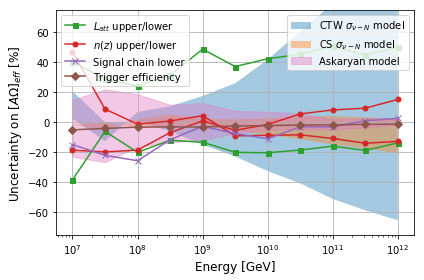

In [8]:

plot0 = plt.fill_between(nofz_up["Energy"]/1E9,ratio_sigma_low, ratio_sigma_up, label="CTW $\sigma_{\\nu-N}$ model", alpha=0.4)
plot1 = plt.fill_between(nofz_up["Energy"]/1E9,ratio_sigmacs_low, ratio_sigmacs_up, label="CS $\sigma_{\\nu-N}$ model", alpha=0.4)
plot2 = plt.fill_between(nofz_up["Energy"]/1E9,ratio_askaryan_low, ratio_askaryan_up,color="C6", label="Askaryan model", alpha=0.4)

# plt.plot(nofz_up["Energy"],ratio_sigma_up ,"--", marker="o",markersize="5",color="C0", label="Sigma upper")
# plt.plot(nofz_up["Energy"],ratio_sigma_low,linestyle="dotted",marker="o", markersize="5",color="C0", label="Sigma lower")
# plt.plot(nofz_up["Energy"],ratio_askaryan_up,"--", marker="*",markersize="6",color="C1", label="Askaryan upper")
# plt.plot(nofz_up["Energy"],ratio_askaryan_low,linestyle="dotted",marker="*", markersize="6",color="C1", label="Askaryan lower")
plot3, = plt.plot(nofz_up["Energy"]/1E9,ratio_Latten_low+abs(err_ratio_Latten_low),marker="s", markersize="5",color="C2", label="$L_{att}$ upper/lower")
plot4, = plt.plot(nofz_up["Energy"]/1E9,ratio_Latten_up-abs(err_ratio_Latten_up), marker="s",markersize="5",color="C2", label='_nolegend_')
plot5, = plt.plot(nofz_up["Energy"]/1E9,ratio_nofz_up-abs(err_ratio_nofz_up), marker="o",markersize="5",color="C3", label="$n(z)$ upper/lower")
plot6, = plt.plot(nofz_up["Energy"]/1E9,ratio_nofz_low+abs(err_ratio_nofz_low),marker="o", markersize="5",color="C3", label='_nolegend_')
plot7, = plt.plot(nofz_up["Energy"]/1E9,ratio_signal_chain_low,marker="x", markersize="6",color="C4", label="Signal chain lower")
plot8, = plt.plot(nofz_up["Energy"]/1E9,trig_eff_ratio,marker="D", markersize="6",color="C5", label="Trigger efficiency")

# plot3 = plt.errorbar(nofz_up["Energy"]/1E9,ratio_Latten_low,err_ratio_Latten_low, color="C2",label="$L_{att}$ upper/lower")
# plot4 = plt.errorbar(nofz_up["Energy"]/1E9,ratio_Latten_up,err_ratio_Latten_up,color="C2", label='_nolegend_')
# plot5 = plt.errorbar(nofz_up["Energy"]/1E9,ratio_nofz_up,err_ratio_nofz_up,color="C3",alpha=0.5, label="$n(z)$ upper/lower")
# plot6 = plt.errorbar(nofz_up["Energy"]/1E9,ratio_nofz_low, err_ratio_nofz_low, color="C7",alpha=0.5, label='_nolegend_')
# plot7, = plt.plot(nofz_up["Energy"]/1E9,ratio_signal_chain_low,marker="x", markersize="6",color="C4", label="Signal chain lower")
# plot8, = plt.plot(nofz_up["Energy"]/1E9,trig_eff_ratio,marker="D", markersize="6",color="C5", label="Trigger efficiency")


# plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
first_legend = plt.legend(handles=[plot0, plot1, plot2], loc='upper right')
ax = plt.gca().add_artist(first_legend)
# second_legend = plt.legend(handles=[plot3], loc='upper left')

plt.legend(handles=[plot3,plot4,plot5,plot6,plot7,plot8], loc='upper left')

plt.ylim(-75,75)
plt.grid()
plt.xscale("log")
plt.ylabel("Uncertainty on $[A\Omega]_{eff}$ [%]", fontsize=12)
plt.xlabel("Energy [GeV]", fontsize=12)
plt.tight_layout()

plt.savefig("./rel_diff_all.pdf")
# plt.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/rel_diff_all.png", dpi=350)


In [10]:
nofz_up["Energy"]/1E9

0     1.000000e+07
1     3.162278e+07
2     1.000000e+08
3     3.162278e+08
4     1.000000e+09
5     3.162278e+09
6     1.000000e+10
7     3.162278e+10
8     1.000000e+11
9     3.162278e+11
10    1.000000e+12
Name: Energy, dtype: float64

In [19]:
trig_eff_ratio

0    -4.9
1    -4.0
2    -3.1
3    -3.0
4    -3.0
5    -2.4
6    -2.1
7    -1.7
8    -1.6
9    -1.3
10   -1.1
Name: relative_difference, dtype: float64